# What this notebook teaches

1. Advanced `Masking`: combining multiple masks
2. `Apply` operation: for **transforming** columns and **creating** new ones
3. `Groupby` operation
4. More `plotting` functionalities

# Options

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Read the data

In [3]:
df = pd.read_csv(os.path.join('data/global-data-on-sustainable-energy.csv'))
df.head(3)
df.shape

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953


(3649, 21)

# Advanced Masking

![](media/dino.jpeg)

## Using `&` (AND) operator

Let's say i want:
1. `United States`
2. from `2012`


In [5]:
mask_us = df['Entity'] == 'United States'
mask_2012 = df['Year'] == 2012

In [7]:
df.loc[mask_us & mask_2012]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3514,United States,2012,100.0,100.0,NaN,NaN,8.73,2779.02,769.33,492.32,...,79102.34,5.15,4956060.059,6.886334,2.249546,51602.93105,36,9833517.0,37.09024,-95.712891


And if i now want all countries where:
1. In the year `2018`
2. had `gdp_growth` of at least 7.5

In [8]:
mask_2018 = df['Year'] == 2018
mask_gdp_growth = df['gdp_growth'] > 7.5

In [9]:
df.loc[mask_gdp_growth & mask_2018,:]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
291,Bangladesh,2018,91.800000,21.9,2.72,235500000.0,26.88,72.56,0.0,1.40,...,2630.02780,2.30,83449.996950,0.747117,7.863754,1698.132081,"1,265",148460.0,23.684994,90.356331
942,Djibouti,2018,60.564186,9.3,0.38,30470000.0,27.84,0.05,0.0,0.00,...,3133.48050,2.02,400.000006,NaN,8.407663,3141.861711,43,23200.0,11.825138,42.590275
1615,Ireland,2018,100.000000,100.0,NaN,NaN,10.78,20.70,0.0,10.20,...,38573.79700,1.41,37659.999850,14.717063,9.030161,79068.974610,73,84421.0,53.412910,-8.243890
1930,Libya,2018,67.000000,NaN,0.76,NaN,2.75,32.11,0.0,0.01,...,31662.73600,7.16,56619.998930,NaN,15.132800,7877.124610,4,1759540.0,26.335100,17.228331
2056,Maldives,2018,100.000000,98.8,21.21,5690000.0,1.12,0.61,0.0,0.03,...,17020.91000,2.56,2099.999905,NaN,8.123129,10279.079980,"1,802",298.0,3.202778,73.220680
2182,Mongolia,2018,98.100000,48.7,79.31,116030000.0,3.26,5.71,0.0,0.44,...,22486.17200,6.37,21549.999240,NaN,7.744881,4156.846970,2,1564116.0,46.862496,103.846656
2322,Nepal,2018,93.920000,32.3,39.61,14870000.0,74.27,0.00,0.0,4.99,...,1753.60060,5.68,15189.999580,NaN,7.622376,1178.525932,203,147181.0,28.394857,84.124008
2763,Rwanda,2018,36.968150,1.4,10.61,15840000.0,84.50,0.49,0.0,0.37,...,491.12625,4.01,1289.999962,NaN,8.579425,783.637163,525,26338.0,-1.940278,29.873888
3071,Somalia,2018,50.764977,2.7,0.71,3210000.0,94.93,0.33,0.0,0.02,...,236.28375,11.69,660.000026,NaN,7.678880,389.831395,25,637657.0,5.152149,46.199616
3247,Tajikistan,2018,99.300000,80.9,566.26,NaN,39.47,1.27,0.0,18.21,...,7761.81640,4.73,8680.000305,NaN,7.599999,853.218873,68,144100.0,38.861034,71.276093


If we just want the list:

In [8]:
df.loc[mask_gdp_growth & mask_2018,'Entity'].tolist()

['Bangladesh',
 'Djibouti',
 'Ireland',
 'Libya',
 'Maldives',
 'Mongolia',
 'Nepal',
 'Rwanda',
 'Somalia',
 'Tajikistan']

And all the countries whose gdp went down in 2018?

In [10]:
mask_2018 = df['Year'] == 2018
mask_negative_gdp_growth = df['gdp_growth'] < 0

df.loc[mask_negative_gdp_growth & mask_2018,'Entity'].tolist()

['Angola',
 'Argentina',
 'Barbados',
 'Bermuda',
 'Equatorial Guinea',
 'Lebanon',
 'Lesotho',
 'Nicaragua',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'Sudan']

## Using `|` (OR) operator

I want all data from both:
1. `Albania`
2. and `Angola`

In [10]:
mask_albania = df['Entity'] == 'Albania'
mask_angola = df['Entity'] == 'Angola'

In [11]:
df.loc[mask_albania | mask_angola,:].head(3) # remove the .head to confirm the results

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
21,Albania,2000,100.0,38.2,NaN,NaN,NaN,0.14,0.0,4.55,...,9029.4375,4.13,3170.00000,NaN,6.946217,1126.683340,105,28748.0,41.153332,20.168331
22,Albania,2001,100.0,40.5,NaN,NaN,NaN,0.13,0.0,3.52,...,8635.5320,3.89,3230.00000,NaN,8.293313,1281.659826,105,28748.0,41.153332,20.168331
23,Albania,2002,100.0,43.2,NaN,NaN,NaN,0.16,0.0,3.48,...,9443.5550,4.10,3759.99999,NaN,4.536524,1425.124219,105,28748.0,41.153332,20.168331


Pretty cool! However, we don't have to stick to conditions on the same columns:

For `2020`, I want the countries where `either`:
1. The `GDP` grew by at least 4.0
2. The `Primary energy consumption per capita` was above 1050

In [12]:
mask_2020 = df['Year'] == 2020
mask_gdp = df['gdp_growth'] > 4.0
mask_energy_consumption = df['Primary energy consumption per capita (kWh/person)'] > 1050

In [13]:
df.loc[mask_2020 & (mask_gdp | mask_energy_consumption)]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
41,Albania,2020,100.000000,81.30,NaN,NaN,NaN,0.00,0.00,5.31,...,11158.0030,NaN,NaN,NaN,-3.955398,5246.292306,105,28748.0,41.153332,20.168331
62,Algeria,2020,99.804130,99.70,15.64,NaN,NaN,72.01,0.00,0.72,...,14933.8070,NaN,NaN,0.297899,-5.100000,3306.858208,18,2381741.0,28.033886,1.659626
83,Angola,2020,46.890610,50.20,115.43,NaN,NaN,4.49,0.00,12.10,...,3527.1600,NaN,NaN,NaN,-5.399987,1776.166868,26,1246700.0,-11.202692,17.873887
104,Antigua and Barbuda,2020,100.000000,100.00,167.98,NaN,NaN,0.31,0.00,0.02,...,27785.2270,NaN,NaN,NaN,-20.192371,13992.744480,223,443.0,17.060816,-61.796428
125,Argentina,2020,100.000000,99.90,311.28,NaN,NaN,91.58,10.06,37.05,...,19314.0660,NaN,NaN,12.179417,-9.895269,8579.017773,17,2780400.0,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,Uzbekistan,2020,100.000000,84.25,60.02,NaN,NaN,50.93,0.00,5.01,...,15860.6090,NaN,NaN,2.523421,1.714771,1750.697113,79,447400.0,41.377491,64.585262
3585,Vanuatu,2020,67.333270,7.60,37.84,NaN,NaN,0.05,0.00,0.02,...,2923.5380,NaN,NaN,NaN,-6.813991,2870.089300,25,12189.0,-15.376706,166.959158
3606,Yemen,2020,73.757930,61.50,8.48,NaN,NaN,2.74,0.00,0.49,...,1092.0021,NaN,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388
3627,Zambia,2020,44.524475,10.40,138.23,NaN,NaN,2.00,0.00,13.10,...,3099.0830,NaN,NaN,NaN,-2.785055,985.132436,25,752618.0,-13.133897,27.849332


Very cool! Now i can compute any analysis for this data

In [15]:
# what is the distribution of land area density of these countries?

df.loc[mask_2020 & (mask_gdp | mask_energy_consumption),'Land Area(Km2)'].describe().astype(int)

count        157
mean      660309
std      1665289
min           21
25%        21041
50%       112090
75%       488100
max      9984670
Name: Land Area(Km2), dtype: int64

In [17]:
# What is the average `Financial aid to developing countries` of these countries in 2020, in thousands of $

df.loc[mask_2020 & (mask_gdp | mask_energy_consumption),'Financial flows to developing countries (US $)'].mean() / 1_000

30.0

# `Apply` operation

Let's go back to the supermarket sales

In [19]:
df = pd.read_csv(os.path.join('data','supermarket_sales.csv'))
df.head(3)
df.shape

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


(1000, 17)

In [21]:
a = 'dd/mm/yyy'
a.split('/')[0]

'dd'

## In strings

`.apply` can be incredibly useful for string columns to help you parse and clean them for further analysis.

For example, it would have been useful to use the Date column to at least analyze the data throughout time.

We know that this dataset is only for the year 2019, so let's extract the month and day of the month so that we can use this information for further analysis

In [24]:
df['Date'].apply(lambda row: row.split('/')[0])

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Date, Length: 1000, dtype: object

We applied a function to each row, which extracts the first string after splitting by the character `/` in order to get the month part of the date

In [25]:
#doing the same to extract the day
df['Date'].apply(lambda row: row.split('/')[1]) # day of the month

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: object

We can create new columns in our dataset with this info! Let's add this new data to our dataset

In [26]:
df['month'] = df['Date'].apply(lambda row: row.split('/')[0])
df['day'] = df['Date'].apply(lambda row: row.split('/')[1])

In [27]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3


Now that we have this extra information, we can do a lot more analysis to the data!

In [28]:
# how many sales in January?
mask_january = df['month'] == "1"

df.loc[mask_january,'Total'].sum()

116291.86800000002

In [29]:
# what was the day of february with the largest purchase?
mask_february = df['month'] == "2"
index = df.loc[mask_february,'Total'].idxmax()

df.loc[index,'day']

'15'

In [33]:
# and the rest of the data for this day?
df.loc[index,:].to_frame('Value')

,Value
Invoice ID,860-79-0874
Branch,C
City,Naypyitaw
Customer type,Member
Gender,Female
Product line,Fashion accessories
Unit price,99.3
Quantity,10
Tax 5%,49.65
Total,1042.65


In [34]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3


## In numerical data

There are some columns that are computed through operations on other columns:

For example:

1. `Tax 5%`: is simply `Unit price` * `Quantity` * 0.05
2. `Total`: is `Unit price` * `Quantity` + `Tax 5%`


Let's do the `Tax 5%`

In [35]:
total_before_taxes = df['Unit price'] * df['Quantity']
total_before_taxes

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Length: 1000, dtype: float64

In [37]:
tax_5 = total_before_taxes.apply(lambda row: row * 0.05)
tax_5

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Length: 1000, dtype: float64

How do we compare our solution with the `Tax 5%` column? As always there are many ways to do that:

In [38]:
# visually
pd.concat([tax_5.rename('Ours'), df['Tax 5%']],axis=1)

,Ours,Tax 5%
0,26.1415,26.1415
1,3.8200,3.8200
2,16.2155,16.2155
3,23.2880,23.2880
4,30.2085,30.2085
...,...,...
995,2.0175,2.0175
996,48.6900,48.6900
997,1.5920,1.5920
998,3.2910,3.2910


In [41]:
# numerically 
(tax_5 - df['Tax 5%']).round(5).value_counts()

-0.0    1000
Name: count, dtype: int64

Awesome! This confirms we did it well

> Let's say that now we want the `Total` in thousands of $ 

In [42]:
df.loc[:,'Total (thousands $)'] = df['Total'].apply(lambda row: row / 1000)

In [44]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,Total (thousands $)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,0.548971
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,0.080220
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,0.340526
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27,0.489048
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8,0.634379


# Groupby


[complete docs for groupby in Pandas](https://pandas.pydata.org/docs/reference/groupby.html)


Often you want to compute information across all unique categories of a column.

In [46]:
df = pd.read_csv(os.path.join('data','global-data-on-sustainable-energy.csv'))
df.head(3)
df.shape

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953


(3649, 21)

> What was the average gdp growth across **all countries** between `2015` and `2019`?

In [51]:
mask_years = (df['Year'] >= 2015) & (df['Year'] <= 2019)

(df
 .loc[mask_years,:] # select only data for the years between 2015 and 2019
 .groupby('Entity') # group by the countries
 ['gdp_growth'].mean() # get the average value of gdp_growth for each country
 .sort_values(ascending=False) # sort the result in descending order
)

Entity
Ireland                             10.021132
Ethiopia                             8.914074
Somalia                              8.329505
Bangladesh                           7.393346
Guinea                               7.390242
                                      ...    
Saint Kitts and Nevis                     NaN
Saint Lucia                               NaN
Saint Vincent and the Grenadines          NaN
Slovakia                                  NaN
Yemen                                     NaN
Name: gdp_growth, Length: 175, dtype: float64

## Plotting

pretty cool right? The results of groupby make some very good candidates for visualization

<Axes: xlabel='Entity'>

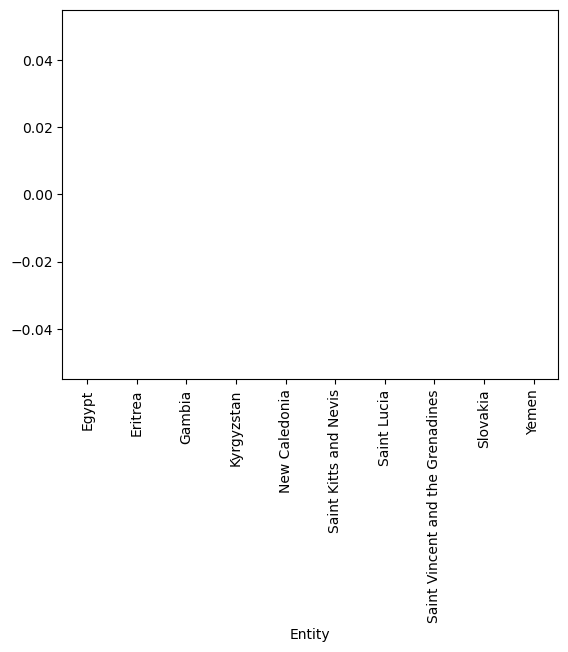

In [52]:
(df
 .loc[mask_years,:] # select only data for the years between 2015 and 2019
 .groupby('Entity') # group by the countries
 ['gdp_growth'].mean() # get the average value of gdp_growth for each country
 .sort_values(ascending=False) # sort the result in descending order
 .plot.bar()
)

![](media/ugly.jpg)

**Ouch** that hurts. There are so many countries in this dataset that they don't fit very well in the figure

We can try a few things:
1. Increase the figure size
2. rotate the labels by 45 degrees
3. plot only the top 10 

<Axes: title={'center': 'Top 10 Countries by gdp growth between 2015 and 2019'}, xlabel='Country', ylabel='% gdp growth'>

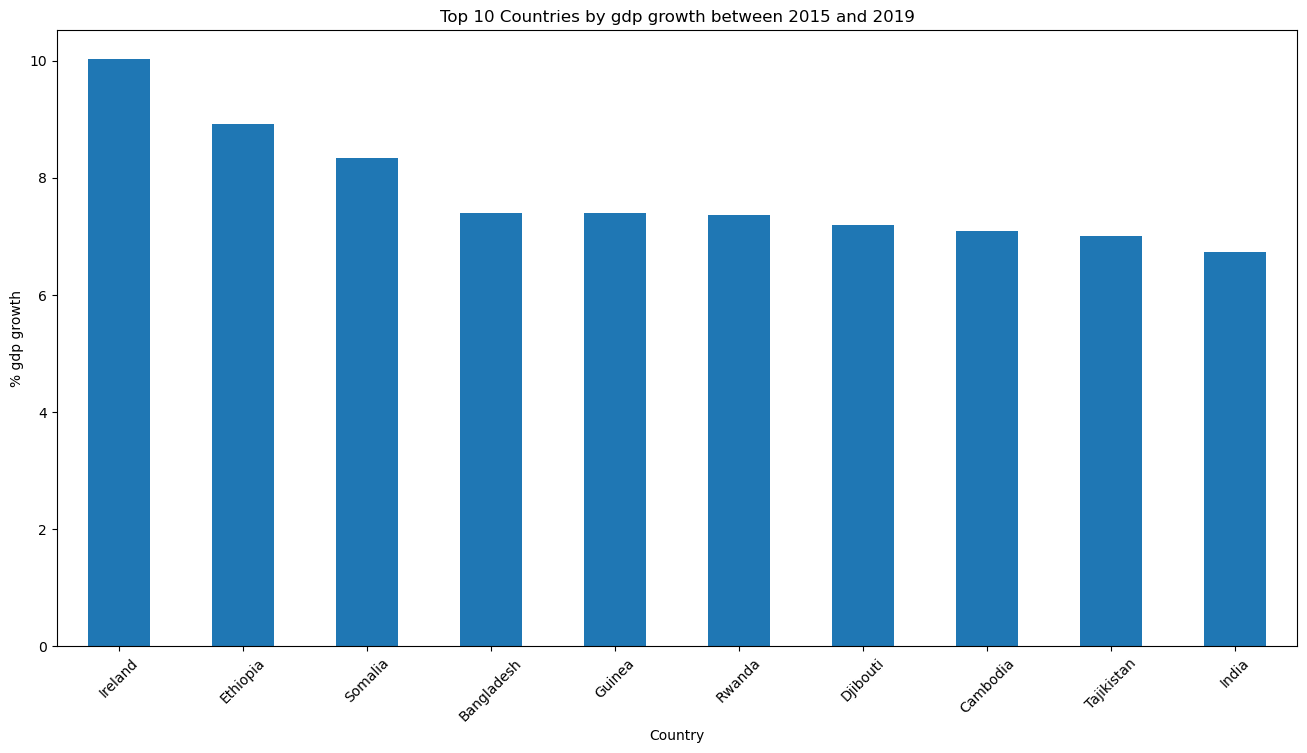

In [48]:
(df
 .loc[mask_years,:] # select only data for the years between 2015 and 2019
 .groupby('Entity') # group by the countries
 ['gdp_growth'].mean() # get the average value of gdp_growth for each country
 .sort_values(ascending=False) # sort the result in descending order
 .iloc[:10] # select top 10
 .plot.bar(rot=45,
           figsize=(16,8),
           title='Top 10 Countries by gdp growth between 2015 and 2019', 
           ylabel='% gdp growth',
           xlabel='Country'
          )
)

Much better! Font size for the labels and title are a bit small though, let's increase them

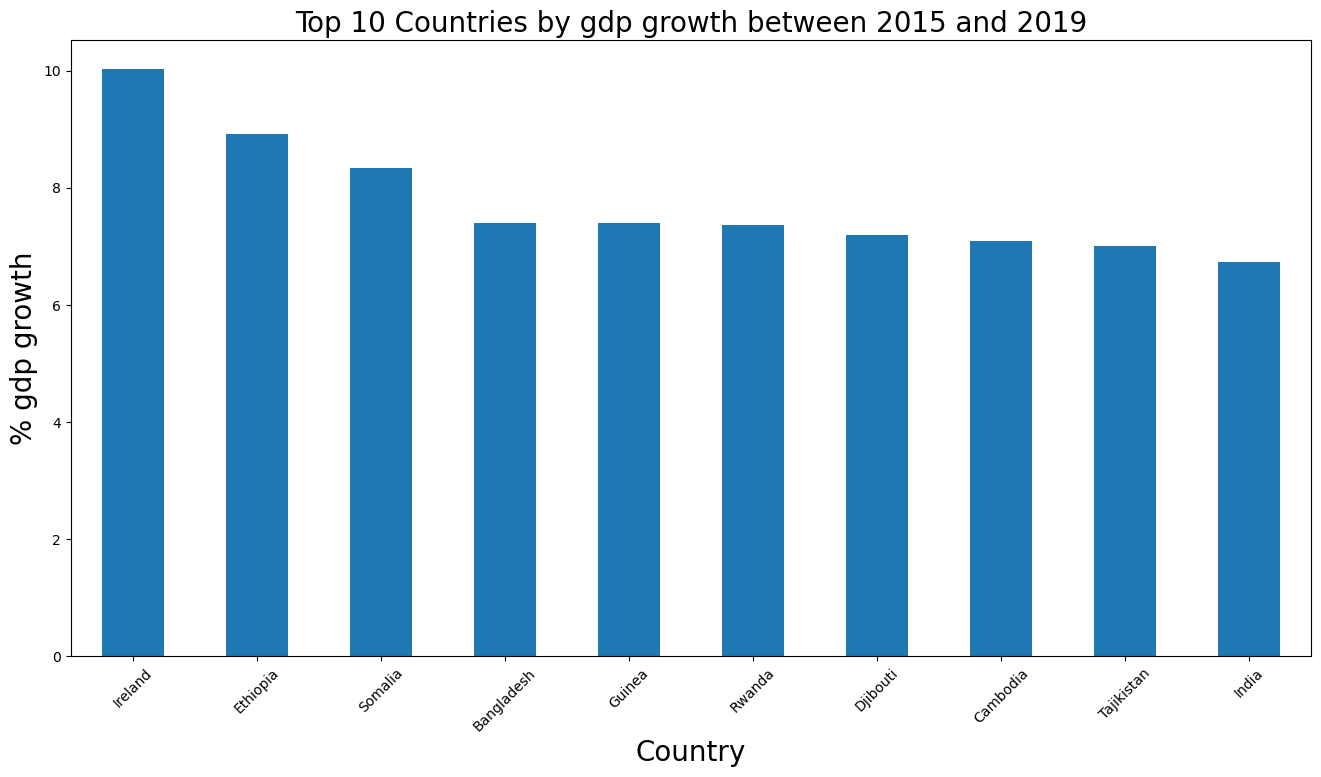

In [35]:
ax = (df
     .loc[mask_years,:] # select only data for the years between 2015 and 2019
     .groupby('Entity') # group by the countries
     ['gdp_growth'].mean() # get the average value of gdp_growth for each country
     .sort_values(ascending=False) # sort the result in descending order
     .iloc[:10] # select top 10
     .plot.bar(rot=45,
               figsize=(16,8)
              )
    )

ax.set_xlabel('Country', fontsize=20);
ax.set_ylabel('% gdp growth', fontsize=20);
ax.set_title('Top 10 Countries by gdp growth between 2015 and 2019', fontsize=20);

## Continuing Groupby

Groupby is a very powerful tool, let's analyze more use cases we can do with it

> What is the average gdp growth by year of our list of countries?

In [53]:
df.groupby('Year')['gdp_growth'].mean()

Year
2000    4.300344
2001    3.365428
2002    3.414374
2003    4.039049
2004    5.911710
2005    5.158672
2006    6.126791
2007    5.792441
2008    4.000764
2009   -0.016608
2010    4.301192
2011    3.868634
2012    4.142701
2013    3.445341
2014    3.371002
2015    2.999501
2016    3.102784
2017    3.408944
2018    3.363001
2019    2.866852
2020   -4.532741
Name: gdp_growth, dtype: float64

> In total, how much did each country financially aid developing countries? (in billions of \$)

In [55]:
df.groupby('Entity')['Financial flows to developing countries (US $)'].sum().sort_values(ascending=False) / 1_000_000_000

Entity
India             13.64066
Pakistan           9.38093
Nigeria            7.63776
Ethiopia           7.08098
Turkey             6.85095
                    ...   
Netherlands        0.00000
Cayman Islands     0.00000
Montenegro         0.00000
Croatia            0.00000
Latvia             0.00000
Name: Financial flows to developing countries (US $), Length: 176, dtype: float64

again, we can make a visualization out of this

<Axes: title={'center': 'Top countries with most financial aid to developing countries between 2000 and 2020'}, xlabel='Country', ylabel='$ (billions)'>

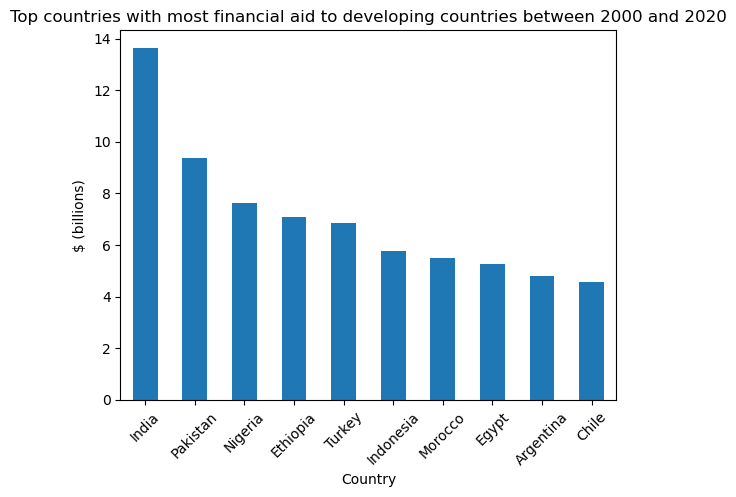

In [56]:
result = df.groupby('Entity')['Financial flows to developing countries (US $)'].sum().sort_values(ascending=False) / 1_000_000_000

result.head(10).plot.bar(title='Top countries with most financial aid to developing countries between 2000 and 2020',rot=45,xlabel='Country',ylabel='$ (billions)')

> What was the worst GDP Growth for each country

In [39]:
df.groupby('Entity')['gdp_growth'].min().sort_values()

Entity
Libya                              -62.075920
Iraq                               -36.658153
Central African Republic           -36.391977
Maldives                           -33.499902
Liberia                            -30.145133
                                      ...    
Saint Kitts and Nevis                     NaN
Saint Lucia                               NaN
Saint Vincent and the Grenadines          NaN
Slovakia                                  NaN
Yemen                                     NaN
Name: gdp_growth, Length: 176, dtype: float64

Where does portugal stand in this?

In [58]:
df.groupby('Entity')['gdp_growth'].min()['Portugal']

-8.442456428

Also, sometimes it can be very useful to know the size of each group. For example:
> How many records do we have per country

In [59]:
df.groupby('Entity').size().sort_values()

Entity
French Guiana     1
South Sudan       8
Montenegro       14
Serbia           14
Afghanistan      21
                 ..
Georgia          21
Germany          21
Ghana            21
Ethiopia         21
Zimbabwe         21
Length: 176, dtype: int64

## Creating your own custom groupby operations with `.apply`

Often, you will need to perform a custom operation on each group.

For example: 
> Give me the countries with the highest gdp growth **by year**

to solve this, we would need:
1. To group the data by year
2. In each group find the index of largest `gdp growth`
3. Use that index to find the `Country` of largest growth
4. repeat for all groups (though groupby handles that for us)

This means we need data from two columns in our groupby operation: `gdp_growth` and `Entity`

In [60]:
# Give me the countries with the highest gdp growth **by year**

df.groupby('Year').apply(lambda subdf: subdf.loc[subdf['gdp_growth'].idxmax(),'Entity'])

Year
2000                Malta
2001    Equatorial Guinea
2002         Sierra Leone
2003               Kuwait
2004                 Iraq
2005           Azerbaijan
2006           Azerbaijan
2007           Azerbaijan
2008                Nauru
2009          Afghanistan
2010             Zimbabwe
2011             Mongolia
2012                Libya
2013                Nauru
2014                Nauru
2015              Ireland
2016                 Iraq
2017                Libya
2018                Libya
2019               Tuvalu
2020               Guyana
dtype: object

pretty awesome right?

We can keep going and perform an even more complex query:
> What is the country that had the highest gdp growth most times?

In [66]:
(df
 .groupby('Year')
 .apply(lambda subdf: subdf.loc[subdf['gdp_growth'].idxmax(),'Entity']) # This is what we had already
 .value_counts()
 .where(lambda x: x == x.max())
 .dropna()
 .index
 .tolist()
)

['Azerbaijan', 'Nauru', 'Libya']

![](media/cat.jpeg)